In [32]:
import pandas as pd

In [33]:
df = pd.read_csv('student_habits_performance.csv')

In [34]:
df.drop(['student_id'],axis=1,inplace=True)

In [35]:
columns = df.columns
for column in columns:
    print(f"{df[column].value_counts()}")
    print(f"Nulls: {df[column].isnull().sum()}\n")

age
20    146
24    134
17    133
21    125
23    119
18    117
19    113
22    113
Name: count, dtype: int64
Nulls: 0

gender
Female    481
Male      477
Other      42
Name: count, dtype: int64
Nulls: 0

study_hours_per_day
3.5    38
3.2    36
4.3    35
3.3    34
3.8    31
       ..
7.5     1
8.2     1
7.6     1
0.1     1
7.1     1
Name: count, Length: 78, dtype: int64
Nulls: 0

social_media_hours
3.1    38
2.9    36
3.2    36
2.2    35
2.1    35
3.0    34
2.4    34
1.9    32
2.3    32
2.8    31
1.8    31
2.0    30
3.3    29
2.5    27
1.4    26
2.7    26
1.7    25
2.6    25
3.6    24
3.5    23
1.5    23
1.6    23
3.4    22
0.0    21
1.2    20
0.9    20
1.3    18
3.8    17
4.0    17
4.3    15
3.7    15
1.1    15
1.0    14
3.9    13
4.2    12
4.5    10
0.7    10
0.8    10
4.6    10
4.9     9
4.1     9
0.2     8
0.6     8
4.7     7
4.4     7
0.3     6
0.5     6
0.4     6
5.0     4
4.8     3
0.1     3
5.4     2
5.3     1
6.0     1
6.1     1
5.6     1
6.2     1
5.7     1
5.2     1
7.2     

In [36]:
import numpy as np
choices = df['parental_education_level'].unique()[:-1]
df['parental_education_level'] = df['parental_education_level'].apply(lambda x: np.random.choice(choices) if pd.isna(x) else x)  

In [37]:
print(df['parental_education_level'].value_counts())

parental_education_level
High School    429
Bachelor       385
Master         186
Name: count, dtype: int64


In [38]:
df.dtypes

age                                int64
gender                            object
study_hours_per_day              float64
social_media_hours               float64
netflix_hours                    float64
part_time_job                     object
attendance_percentage            float64
sleep_hours                      float64
diet_quality                      object
exercise_frequency                 int64
parental_education_level          object
internet_quality                  object
mental_health_rating               int64
extracurricular_participation     object
exam_score                       float64
dtype: object

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1000 non-null   int64  
 1   gender                         1000 non-null   object 
 2   study_hours_per_day            1000 non-null   float64
 3   social_media_hours             1000 non-null   float64
 4   netflix_hours                  1000 non-null   float64
 5   part_time_job                  1000 non-null   object 
 6   attendance_percentage          1000 non-null   float64
 7   sleep_hours                    1000 non-null   float64
 8   diet_quality                   1000 non-null   object 
 9   exercise_frequency             1000 non-null   int64  
 10  parental_education_level       1000 non-null   object 
 11  internet_quality               1000 non-null   object 
 12  mental_health_rating           1000 non-null   in

In [40]:
columns = df.columns
for column in columns:
    if df[column].dtypes == 'object':
        categories = df[column].unique()
        for category in categories:
            df[f'{column}_{category}'] = (df[column] == category).astype('int64')
        df.drop([column],axis=1,inplace=True)

In [42]:
df['under_20'] = (df['age'] <= 20).astype('int64')

In [43]:
df['after_20'] = (df['age'] > 20).astype('int64')

In [44]:
df.drop(['age'],axis=1,inplace=True)

In [49]:
df.columns

Index(['study_hours_per_day', 'social_media_hours', 'netflix_hours',
       'attendance_percentage', 'sleep_hours', 'exercise_frequency',
       'mental_health_rating', 'exam_score', 'gender_Female', 'gender_Male',
       'gender_Other', 'part_time_job_No', 'part_time_job_Yes',
       'diet_quality_Fair', 'diet_quality_Good', 'diet_quality_Poor',
       'parental_education_level_Master',
       'parental_education_level_High School',
       'parental_education_level_Bachelor', 'internet_quality_Average',
       'internet_quality_Poor', 'internet_quality_Good',
       'extracurricular_participation_Yes', 'extracurricular_participation_No',
       'under_20', 'after_20'],
      dtype='object')

In [53]:
df_corr = df.drop([ 'gender_Female', 'gender_Male',
       'gender_Other', 'part_time_job_No', 'part_time_job_Yes',
       'diet_quality_Fair', 'diet_quality_Good', 'diet_quality_Poor',
       'parental_education_level_Master',
       'parental_education_level_High School',
       'parental_education_level_Bachelor', 'internet_quality_Average',
       'internet_quality_Poor', 'internet_quality_Good',
       'extracurricular_participation_Yes', 'extracurricular_participation_No',
       'under_20', 'after_20'],axis=1)
corr_matrix = df_corr.corr()

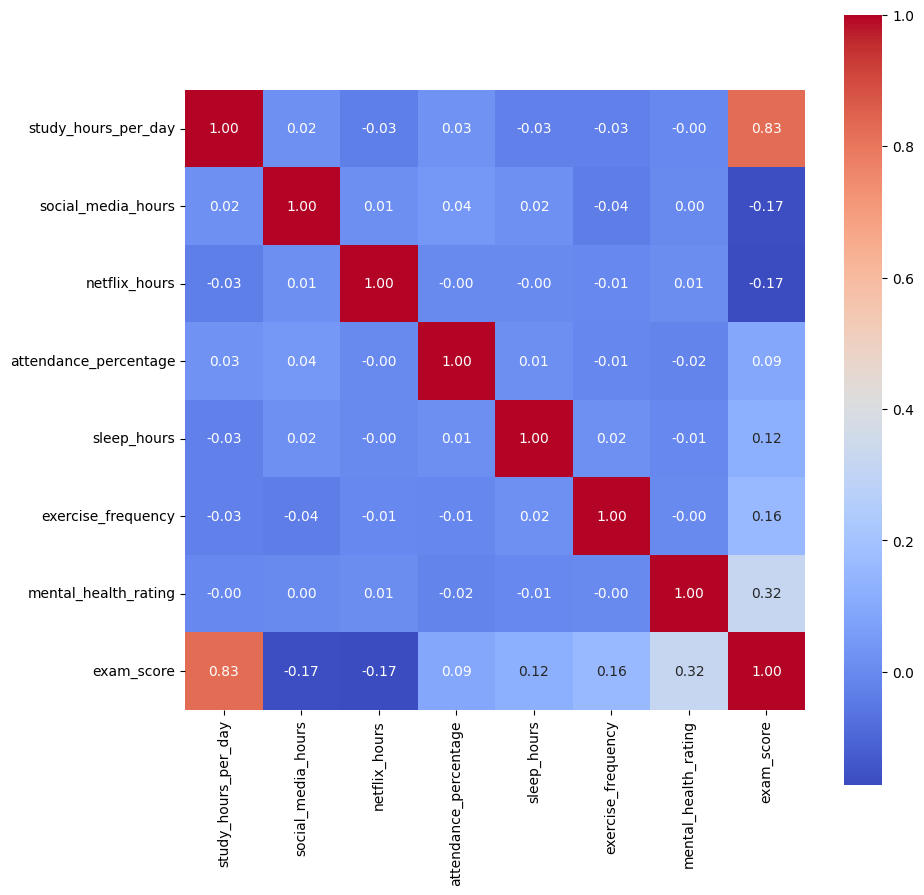

In [54]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',square=True,fmt='.2f')
plt.show()

In [55]:
X , y = df.drop(['exam_score'],axis=1), df['exam_score']

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

In [58]:
from keras import Sequential 
from keras import layers
model = Sequential([
    layers.Dense(1,activation='linear',input_shape=(X_train.shape[1],)),
])

/Users/erdaulet/Desktop/allProjects/myenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [59]:
model.compile(optimizer='adam',loss='mse')

In [60]:
from keras import callbacks
early_stop = callbacks.EarlyStopping(monitor='mse', patience=10, verbose=1, mode='min')

In [65]:
model.fit(X_train,y_train,epochs=1000,callbacks=[early_stop])

Epoch 1/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 36.0992 
Epoch 2/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 37.6340 
Epoch 3/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 34.2813 
Epoch 4/1000


/Users/erdaulet/Desktop/allProjects/myenv/lib/python3.11/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `mse` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 33.6420 
Epoch 5/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 34.5005 
Epoch 6/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37.7510 
Epoch 7/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 34.9663 
Epoch 8/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 35.1197 
Epoch 9/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 33.4269 
Epoch 10/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 35.2509 
Epoch 11/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37.3246 
Epoch 12/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37.3101 
Epoch 13/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36.4704 
Epoch 14/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 34.4214 
Epoch 15/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30.8292 
Epoch 16/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37.6061 
Epoch 17/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31.6877 
Epoch 18/1000
25/25 ━━━━━━━━━━━━━━━━━━━

In [74]:
y_pred = model.predict(X_test)
y_pred = np.clip(y_pred,0,100)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [75]:
from sklearn import metrics
print(f"MSE:{metrics.mean_squared_error(y_test,y_pred)}")
print(f"MAE:{metrics.mean_absolute_error(y_test,y_pred)}")
print(f"RMSE:{np.sqrt(metrics.mean_squared_error(y_test,y_pred))}")
print(f"R**2: {metrics.r2_score(y_test,y_pred)}")

MSE:26.127551262240733
MAE:4.133796998977661
RMSE:5.111511641602779
R**2: 0.898110036381204


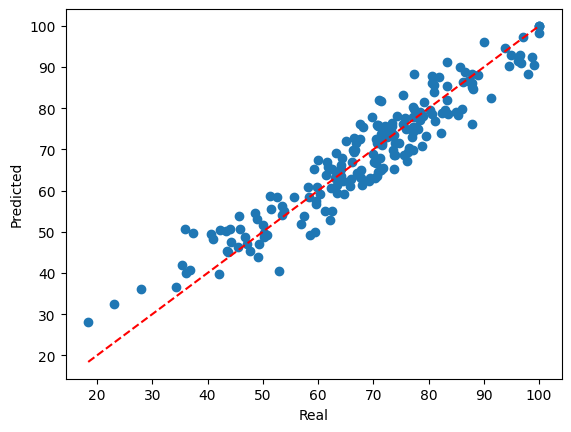

In [77]:
plt.scatter(y_test,y_pred)
plt.xlabel("Real")
plt.ylabel("Predicted")
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--')
plt.show()

In [81]:
columns = df.columns
weights = model.get_weights()[0]
for feature,weight in zip(columns,weights):
    print(f'{feature}\tweight:{weight}')

study_hours_per_day	weight:[9.535303]
social_media_hours	weight:[-2.6816823]
netflix_hours	weight:[-2.322621]
attendance_percentage	weight:[0.14318465]
sleep_hours	weight:[1.9820946]
exercise_frequency	weight:[1.3199799]
mental_health_rating	weight:[1.9536395]
exam_score	weight:[0.52076]
gender_Female	weight:[0.6741196]
gender_Male	weight:[1.3129317]
gender_Other	weight:[0.7530695]
part_time_job_No	weight:[1.1137549]
part_time_job_Yes	weight:[1.0849749]
diet_quality_Fair	weight:[0.11570403]
diet_quality_Good	weight:[0.5293773]
diet_quality_Poor	weight:[0.5674631]
parental_education_level_Master	weight:[0.86008906]
parental_education_level_High School	weight:[1.3446122]
parental_education_level_Bachelor	weight:[0.9254714]
internet_quality_Average	weight:[0.93158096]
internet_quality_Poor	weight:[0.7207061]
internet_quality_Good	weight:[1.1922479]
extracurricular_participation_Yes	weight:[1.3080194]
extracurricular_participation_No	weight:[0.7548832]
under_20	weight:[0.92708373]
